 #  **Restaurant Reviews Sentiment Analysis**

# import libary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/sentiment_analysis/Restaurant_Reviews.tsv" , sep="\t")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
df.head(10)

Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
5     Now I am getting angry and I want my damn pho.      0
6              Honeslty it didn't taste THAT fresh.)      0
7  The potatoes were like rubber and you could te...      0
8                          The fries were great too.      1
9                                     A great touch.      1

In [5]:
df.shape

(1000, 2)

In [6]:
for i in range(20):
  print(df['Review'][i])

Wow... Loved this place.
Crust is not good.
Not tasty and the texture was just nasty.
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
The selection on the menu was great and so were the prices.
Now I am getting angry and I want my damn pho.
Honeslty it didn't taste THAT fresh.)
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
The fries were great too.
A great touch.
Service was very prompt.
Would not go back.
The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.
I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!
I was disgusted because I was pretty sure that was human hair.
I was shocked because no signs indicate cash only.
Highly recommended.
Waitress was a little slow in service.
This place is not worth your time, let alone Vegas.
did not like at all.


In [7]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

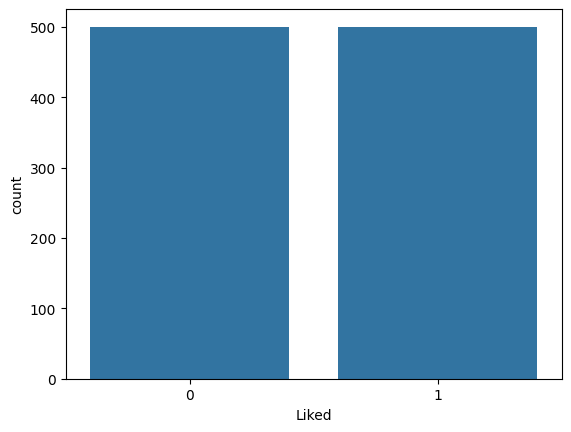

In [8]:
sns.countplot(x = df['Liked'])

In [9]:
df['Review_len'] = df['Review'].apply(len)
df.head()

Review  Liked  Review_len
0                           Wow... Loved this place.      1          24
1                                 Crust is not good.      0          18
2          Not tasty and the texture was just nasty.      0          41
3  Stopped by during the late May bank holiday of...      1          87
4  The selection on the menu was great and so wer...      1          59

In [10]:
max_len_review = df.iloc[df['Review_len'].idxmax()]['Review']
min_len_review = df.iloc[df['Review_len'].idxmin()]['Review']

print(f"Max len charcter Review: {max_len_review}")
print(f"Min len charcter Review: {min_len_review}")

Max len charcter Review: The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).
Min len charcter Review: DELICIOUS!!


# Data Preprocessing and cleaning

In [11]:
df['Review'][5]

'Now I am getting angry and I want my damn pho.'

In [12]:
df.isnull().sum()

Review        0
Liked         0
Review_len    0
dtype: int64

In [13]:
df.duplicated().sum()

4

In [14]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

In [15]:
! pip install nltk

In [16]:
import nltk

In [17]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
stop_words = stopwords.words('english')
print(len(stop_words))
print(stop_words)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [19]:
# List of common negative words to exclude
negative_words = ['no', 'not', 'never', 'none', 'nobody', 'nothing', 'nowhere']

# Remove negative words from stop_words
filtered_stop_words = [word for word in stop_words if word not in negative_words]

def preprocess_text(text: str) -> str:

  sentence = text.lower()
  without_punc_digit_spaces = re.sub('\s+', ' ', re.sub('[^a-z]', ' ', sentence))  # Remove punctuations, numbers, and multiple spaces
  word_tokens = word_tokenize(without_punc_digit_spaces)      # word tokenization
  without_stopwords = [w for w in word_tokens if not w in filtered_stop_words]   # Remove stopwords
  lema_sent = [lemmatizer.lemmatize(word) for word in without_stopwords ]   # Word Lematization
  sen = ' '.join(lema_sent)   # convert list to string

  return sen

In [20]:
corpus = []
senteces = list(df['Review'])
for sen in senteces:
  corpus.append(preprocess_text(sen))

In [21]:
corpus[33]

'seems like good quick place grab bite familiar pub food favor look elsewhere'

In [22]:
df['Clean Text'] = corpus
df.head(10)

Review  Liked  Review_len  \
0                           Wow... Loved this place.      1          24   
1                                 Crust is not good.      0          18   
2          Not tasty and the texture was just nasty.      0          41   
3  Stopped by during the late May bank holiday of...      1          87   
4  The selection on the menu was great and so wer...      1          59   
5     Now I am getting angry and I want my damn pho.      0          46   
6              Honeslty it didn't taste THAT fresh.)      0          37   
7  The potatoes were like rubber and you could te...      0         111   
8                          The fries were great too.      1          25   
9                                     A great touch.      1          14   

                                          Clean Text  
0                                    wow loved place  
1                                     crust not good  
2                            not tasty texture nasty  
3  stopped late may bank holiday rick steve recom...  
4                         selection menu great price  
5                        getting angry want damn pho  
6                               honeslty taste fresh  
7  potato like rubber could tell made ahead time ...  
8                                          fry great  
9                                        great touch

In [23]:
from wordcloud import WordCloud

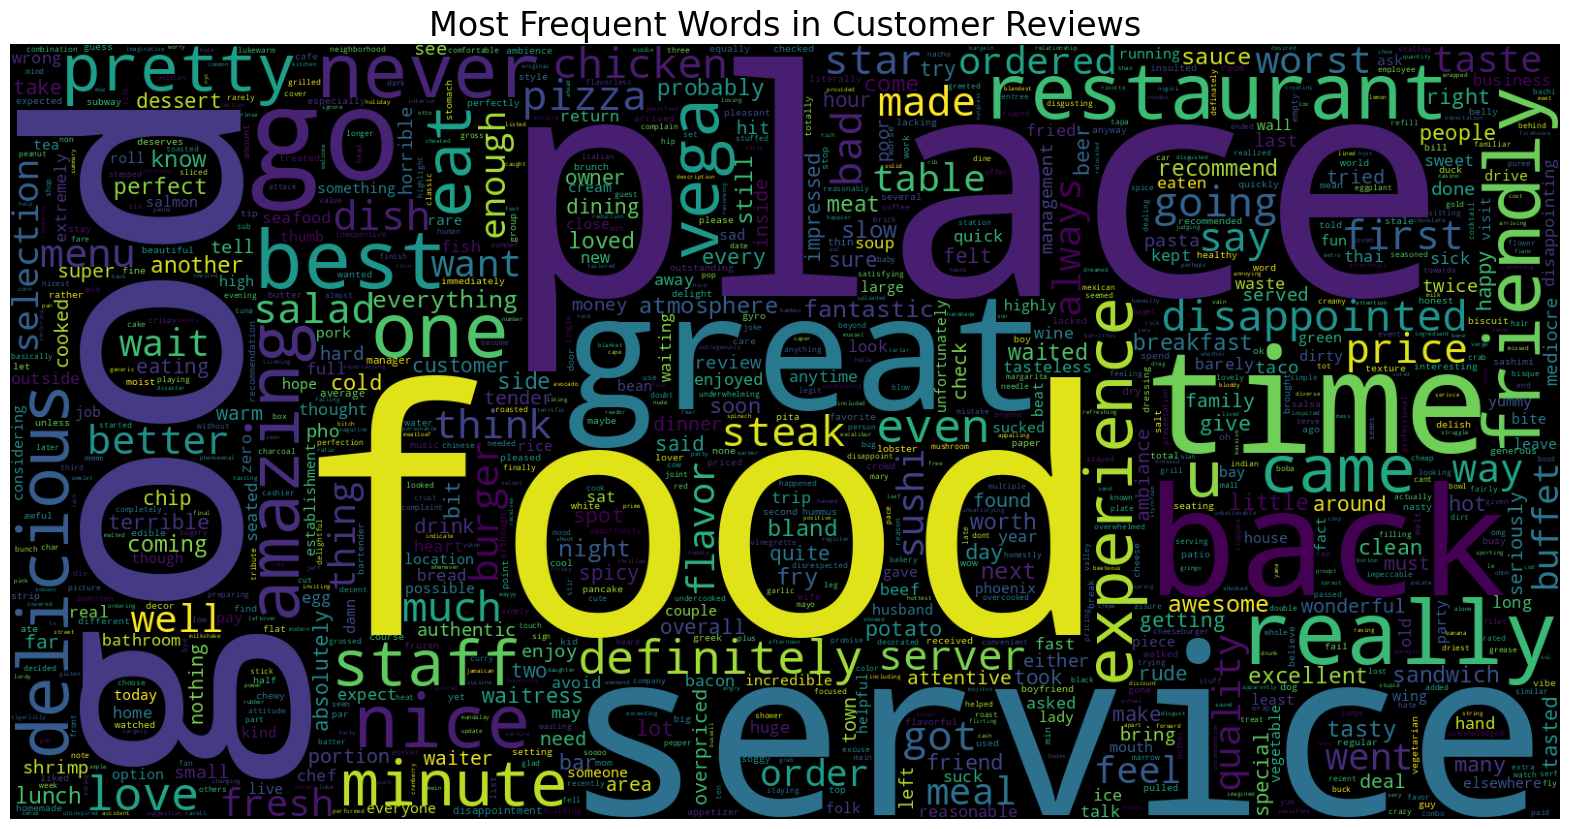

In [24]:
data = df['Clean Text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.title("Most Frequent Words in Customer Reviews", fontsize=24)
plt.show()

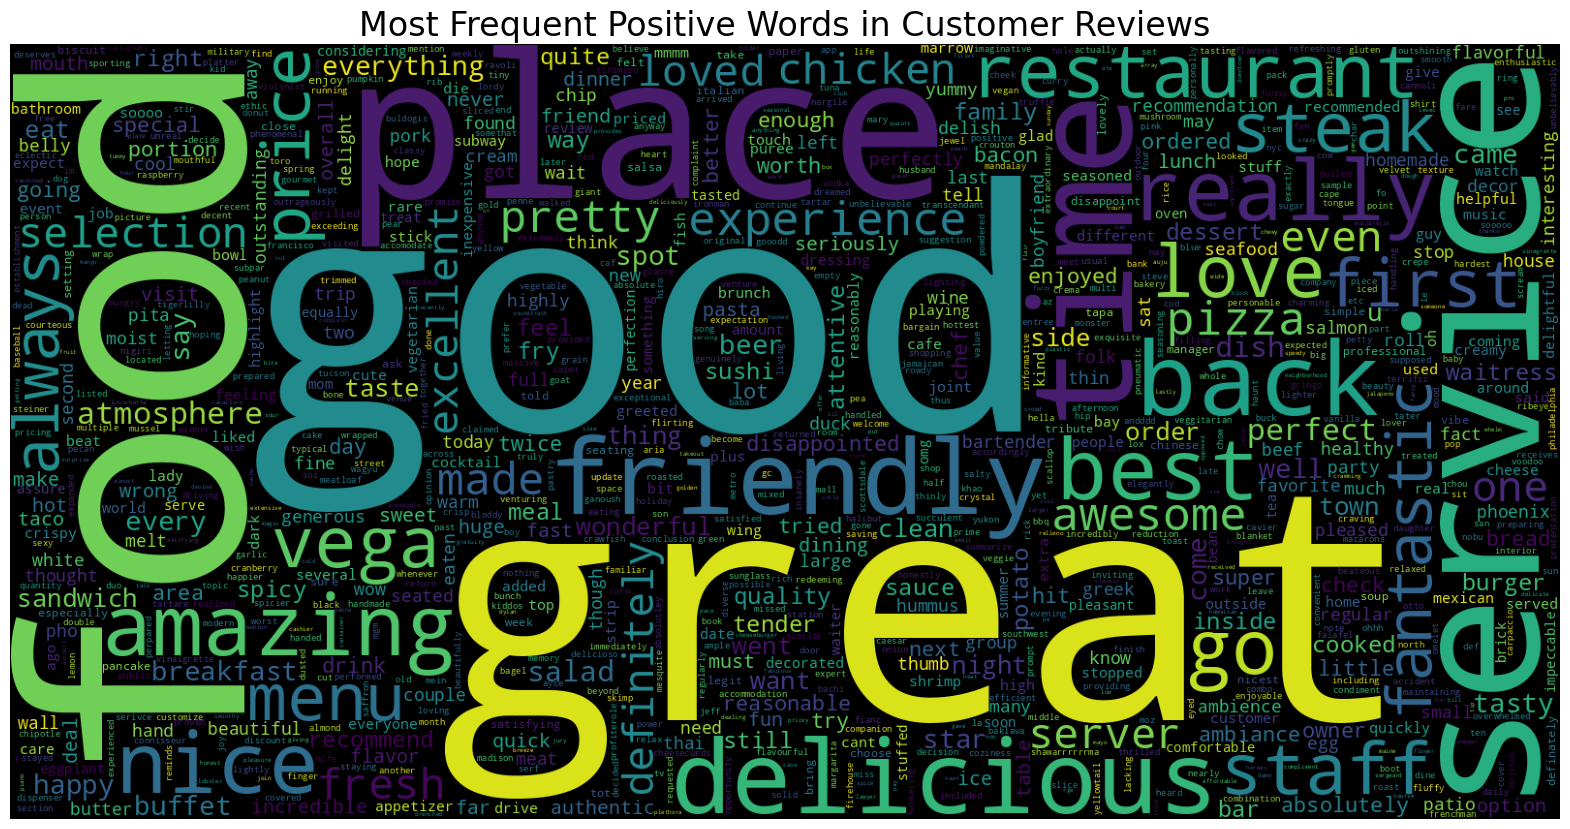

In [25]:
data = df[df['Liked'] == 1]['Clean Text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.title("Most Frequent Positive Words in Customer Reviews", fontsize=24)
plt.show()

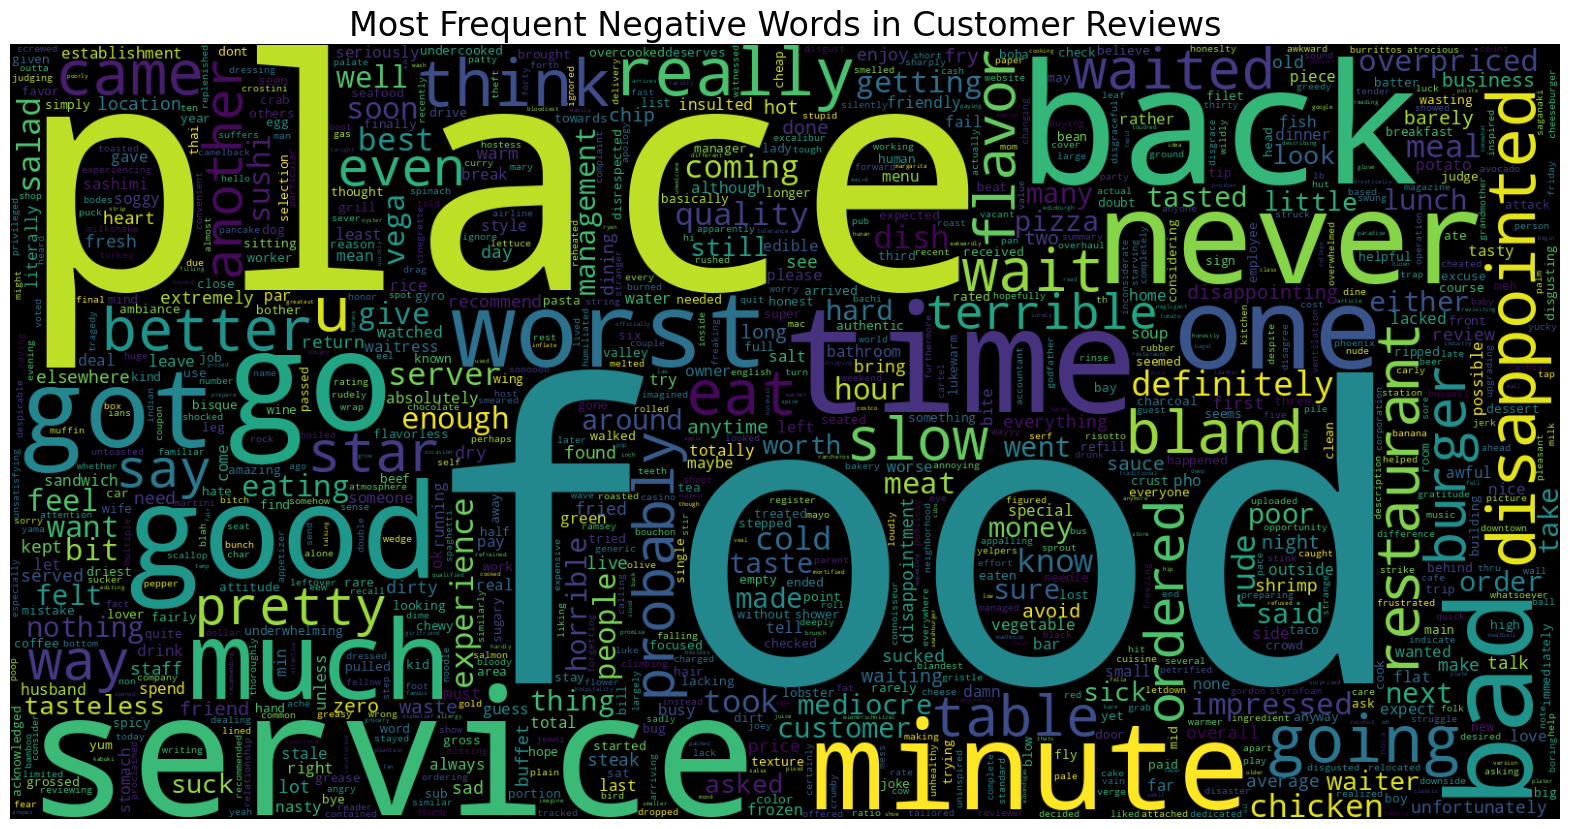

In [26]:
data = df[df['Liked'] == 0]['Clean Text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.title("Most Frequent Negative Words in Customer Reviews", fontsize=24)
plt.show()

# Vectorization (Bag of Words Vectorizer)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
bow_vectorizer  = CountVectorizer()

In [29]:
X = bow_vectorizer.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
X.shape

(996, 1767)

In [31]:
# Save the vectorizer
import joblib
with open('vectorizer.pkl', 'wb') as file:
    joblib.dump(bow_vectorizer, file)

In [32]:
y = df['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 996, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
X_train.shape

(796, 1767)

# Model Building & Training

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
nb_model = MultinomialNB(alpha= 0.5, fit_prior= False)

In [38]:
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.5, fit_prior=False)

In [39]:
y_pred = nb_model.predict(X_test)

# Model Evaluation

In [40]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_score

In [41]:
print(confusion_matrix(y_test, y_pred))

[[91 15]
 [28 66]]


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       106
           1       0.81      0.70      0.75        94

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



In [43]:
accuracy = accuracy_score(y_test, y_pred)
score_percentage = round(accuracy * 100, 2)
print(f'accuracy => {score_percentage}%')

accuracy => 78.5%


In [44]:
precision = precision_score(y_test, y_pred)
precision_percentage = round(precision * 100, 2)
print(f'precision => {precision_percentage}%')

precision => 81.48%


# hyperparameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB


In [46]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0,],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}

In [47]:
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=8)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=MultinomialNB(alpha=0.5, fit_prior=False),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0],
                         'fit_prior': [True, False]})

In [48]:
print("Best parameters for Naive Bayes:", grid_search.best_params_)
print("Best score for Naive Bayes:", grid_search.best_score_)

Best parameters for Naive Bayes: {'alpha': 0.5, 'fit_prior': False}
Best score for Naive Bayes: 0.8015025252525252


# Save Model & Deployment

In [49]:
import joblib

In [50]:
joblib.dump(nb_model, "MultinomialNB.pkl")

['MultinomialNB.pkl']

## - Prediction on single review

In [51]:
model = joblib.load('/content/MultinomialNB.pkl')
vectorizer = joblib.load('/content/vectorizer.pkl')

In [52]:
print(vectorizer.vocabulary_)
print(len(vectorizer.vocabulary_))

{'wow': 1748, 'loved': 902, 'place': 1149, 'crust': 352, 'not': 1035, 'good': 659, 'tasty': 1545, 'texture': 1557, 'nasty': 1010, 'stopped': 1487, 'late': 850, 'may': 940, 'bank': 102, 'holiday': 740, 'rick': 1299, 'steve': 1479, 'recommendation': 1257, 'selection': 1365, 'menu': 959, 'great': 673, 'price': 1188, 'getting': 641, 'angry': 35, 'want': 1692, 'damn': 362, 'pho': 1137, 'honeslty': 743, 'taste': 1541, 'fresh': 614, 'potato': 1178, 'like': 876, 'rubber': 1315, 'could': 324, 'tell': 1550, 'made': 915, 'ahead': 17, 'time': 1580, 'kept': 830, 'warmer': 1695, 'fry': 623, 'touch': 1600, 'service': 1376, 'prompt': 1202, 'would': 1746, 'go': 652, 'back': 93, 'cashier': 229, 'no': 1028, 'care': 220, 'ever': 512, 'say': 1344, 'still': 1481, 'ended': 493, 'wayyy': 1707, 'overpriced': 1083, 'tried': 1613, 'cape': 216, 'cod': 278, 'ravoli': 1241, 'chicken': 254, 'cranberry': 338, 'mmmm': 981, 'disgusted': 425, 'pretty': 1187, 'sure': 1524, 'human': 762, 'hair': 695, 'shocked': 1388, 'sig

In [53]:
def get_sentiment(review: str) -> str:
  # preprocessing
  text = preprocess_text(review)
  # vectorization
  text_vector = vectorizer.transform([text]).toarray()
  # prediction
  prediction = model.predict(text_vector)[0]

  return prediction

In [54]:
test_reviews = [
  "The food at this restaurant was amazing! Every dish was bursting with flavor, and the service was top-notch.",
  "I had a wonderful dining experience. The ambiance was perfect, and the staff was incredibly attentive.",
  "This is my new favorite spot! The pizza was fresh and delicious, and the desserts were heavenly.",
  "I love this place! The variety on the menu is impressive, and everything I’ve tried has been fantastic.",
  "We celebrated our anniversary here, and it was perfect! The candlelit dinner made the night special.",
  "I was really disappointed with my meal. The steak was overcooked and the service was slow.",
  "The restaurant was too noisy, and I couldn't enjoy my dinner. I won't be coming back.",
  "I had high hopes for this place, but the food was bland and the staff seemed uninterested.",
  "The wait for our food was ridiculous, and when it finally arrived, it was cold.",
  "I found a hair in my soup, and the manager didn’t handle it well. I will not be returning."
]

prediction_map = {0: "negative", 1: "positive"}

for review in test_reviews:
  sentiment = get_sentiment(review)
  print("Sentiment:", prediction_map[sentiment])


Sentiment: positive
Sentiment: positive
Sentiment: positive
Sentiment: positive
Sentiment: positive
Sentiment: negative
Sentiment: negative
Sentiment: negative
Sentiment: negative
Sentiment: negative
